**About the dataset**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. Several constraints were placed
on the selection of these instances from a larger database. In particular, all patients here are females
at least 21 years old of Pima Indian heritage.2
From the data set in the (.csv) File We can find several variables, some of them are independent
(several medical predictor variables) and only one target dependent variable (Outcome).

In [385]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
! wget https://raw.githubusercontent.com/KrutikaBhavsar/machine-learning-/main/diabetes.csv -nc


File ‘diabetes.csv’ already there; not retrieving.



In [386]:
df = pd.read_csv("diabetes.csv")

In [387]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [388]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [389]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
275,2,100,70,52,57,40.5,0.677,25,0
602,1,124,74,36,0,27.8,0.100,30,0
696,3,169,74,19,125,29.9,0.268,31,1
212,7,179,95,31,0,34.2,0.164,60,0
638,7,97,76,32,91,40.9,0.871,32,1


In [390]:
df.shape

(768, 9)

In [391]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [393]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [394]:
df = df.drop_duplicates()

In [395]:
df.shape

(768, 9)

In [396]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [397]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Here from the above code we first checked that is there any null values from the IsNull() function then we are going to take the sum of all those missing values from the sum() function and the inference we now get is that there are no missing values but that is actually not a true story as in this particular dataset all the missing values were given the 0 as a value which is not good for the authenticity of the dataset. 

In [398]:
Glucose = df[df['Glucose']==0].shape[0]
BloodPressure = df[df['BloodPressure']==0].shape[0]
SkinThickness = df[df['SkinThickness']==0].shape[0]
Insulin = df[df['Insulin']==0].shape[0]
BMI = df[df['BMI']==0].shape[0]

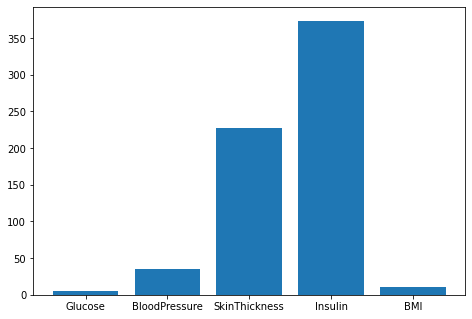

In [399]:
fig_original = plt.figure()
ax = fig_original.add_axes([0,0,1,1])
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
num = [Glucose, BloodPressure, SkinThickness, Insulin, BMI]
ax.bar(features,num)
plt.show()

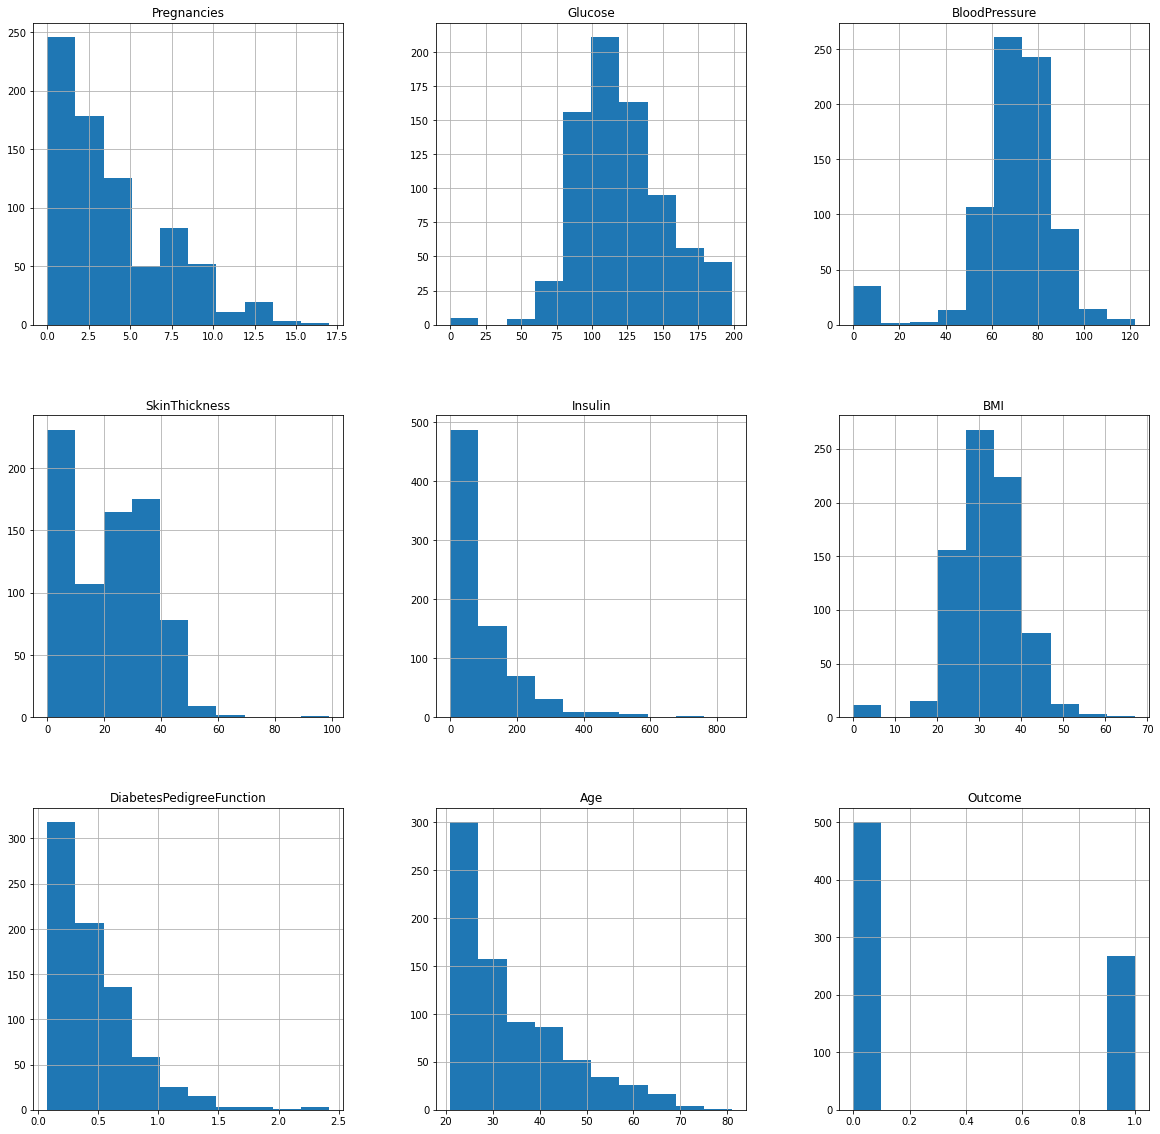

In [400]:
p =df.hist(figsize = (20,20))
#*it shows the occurrence of every kind of value in the graphical structure which in turn lets us know the range of the data.

In [401]:
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
print('Number of zero values in Glucose', df[df['Glucose']==0].shape[0])

Number of zero values in Glucose 0


In [402]:
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())

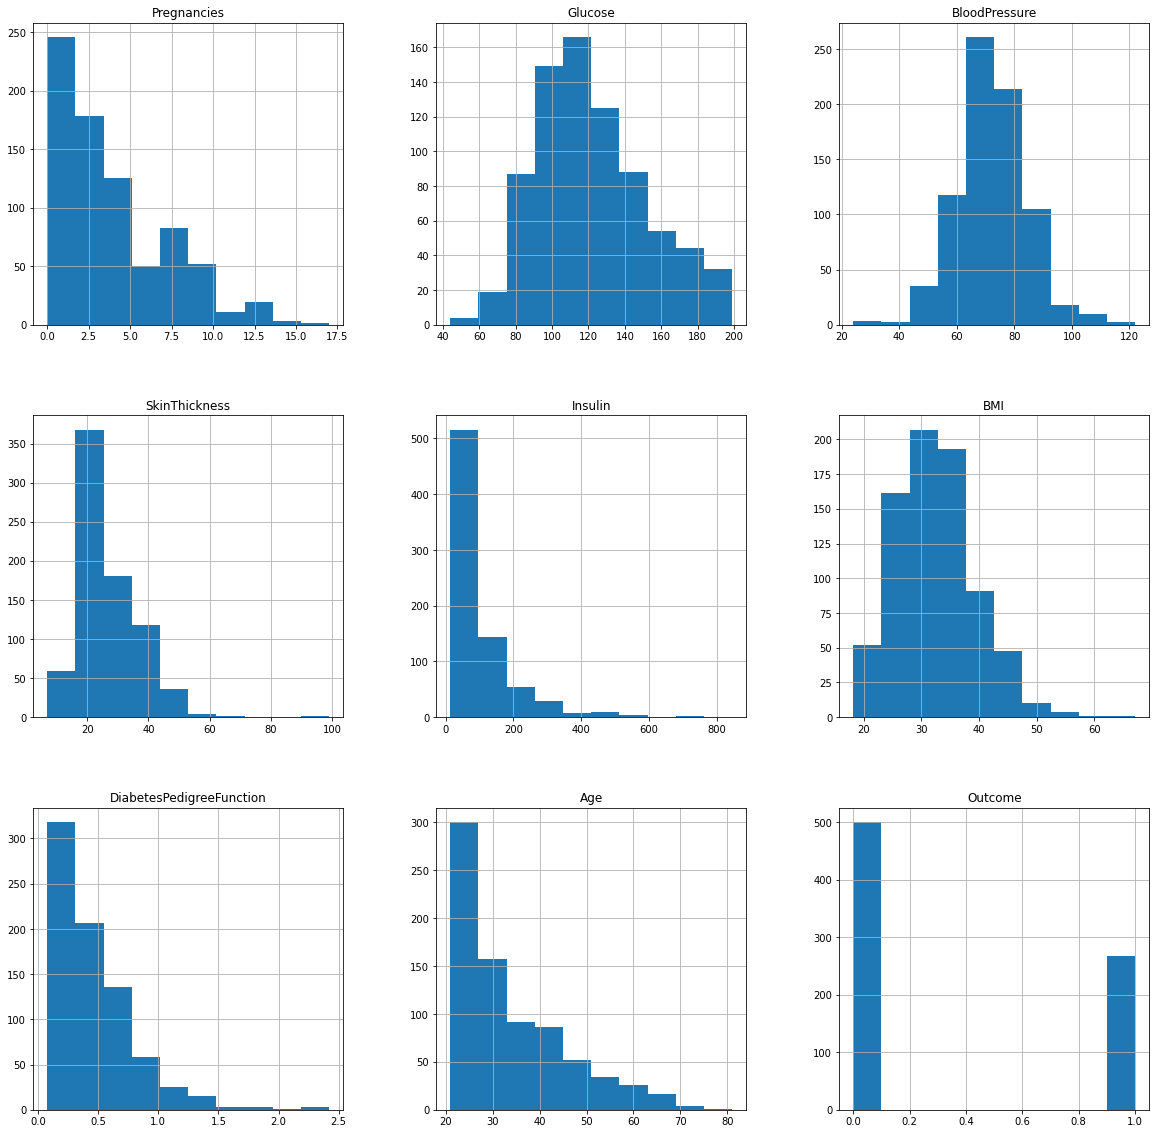

In [403]:
p1 = df.hist(figsize = (20,20))

Here we are again using the hist plot to see the distribution of the dataset but this time we are using this visualization to see the changes that we can see after those null values are removed from the dataset and we can clearly see the difference for example –** In age column after removal of the null values, we can see that there is a spike at the range of 50 to 100 which is quite logical as well** 

In [404]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


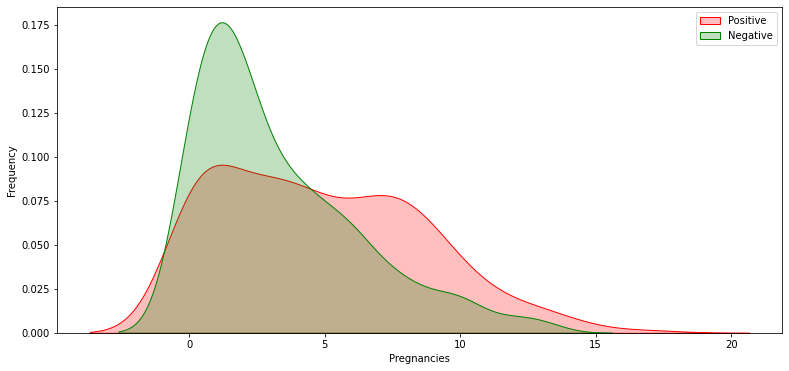

In [405]:
# Explore Pregnancies vs Outcome
plt.figure(figsize=(13,6))
g = sns.kdeplot(df["Pregnancies"][df["Outcome"] == 1], 
     color="Red", shade = True)
g = sns.kdeplot(df["Pregnancies"][df["Outcome"] == 0], 
     ax =g, color="Green", shade= True)
g.set_xlabel("Pregnancies")
g.set_ylabel("Frequency")
g.legend(["Positive","Negative"])

Women with diabetes can and do have healthy pregnancies and healthy babies. Managing diabetes can help reduce your risk for complications. Untreated diabetes increases your risk for pregnancy complications, like high blood pressure, depression, premature birth, birth defects and pregnancy loss.



0    500
1    268
Name: Outcome, dtype: int64


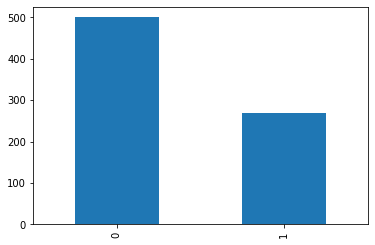

In [406]:
color = {1: "#0392cf", 2: "#7bc043"}
colors = df["Outcome"].map(lambda x: color.get(x + 1))
print(df.Outcome.value_counts())
bal = df.Outcome.value_counts().plot(kind="bar")

Here from the above visualization it is clearly visible that our dataset is completely imbalanced in fact the number of patients who are diabetic is half of the patients who are non-diabetic.

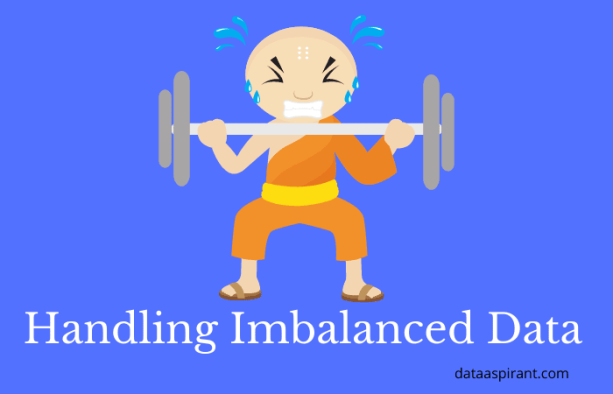


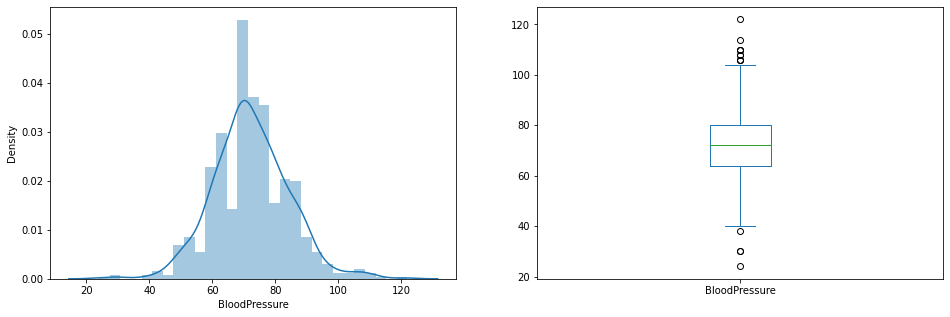

In [407]:
plt.subplot(121), sns.distplot(df['BloodPressure'])
plt.subplot(122), df['BloodPressure'].plot.box(figsize=(16,5))
plt.show()

In [408]:
from collections import Counter
def detect_outliers(df,n,features):
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from numeric features
outliers_to_drop = detect_outliers(df, 2 ,["Pregnancies", 'Glucose', 
                                           'BloodPressure', 'BMI', 
                                           'DiabetesPedigreeFunction', 
                                           'SkinThickness', 'Insulin', 'Age'])

In [409]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [410]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=56)
print(X_train.shape)
print(y_train.shape) 


(576, 8)
(576,)


In [ ]:
#from sklearn.preprocessing import StandardScaler
#X = StandardScaler().fit_transform(X)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [411]:
#Using decision tree
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
res_dtree = dtree.score(X_test, y_test)

In [412]:
#Using boost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(gamma=0)
xgb_model.fit(X_train, y_train)
res_xgb = xgb_model.score(X_test, y_test)

In [413]:
#Using logistic regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
res_logistic_reg = clf.score(X_test, y_test)     

In [414]:
#Using Random forest
from sklearn.ensemble import RandomForestClassifier

clf1 = RandomForestClassifier(max_depth=100, random_state=0)
res =clf1.fit(X_train, y_train)
res_rfc = res.score(X_test, y_test)

In [415]:
#Using knn method
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
res_knn = model.score(X_test, y_test)

In [416]:
#Using linear regression
from sklearn.linear_model import LinearRegression
regg = LinearRegression()
reg = regg.fit(X_train, y_train)
res_linear_reg = reg.score(X_test, y_test)

**Accuracy without normalisation**

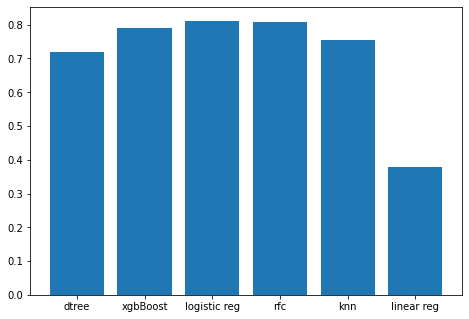

In [417]:
fig_1 = plt.figure()
ax = fig_1.add_axes([0,0,1,1])
methods = ['dtree','xgbBoost', 'logistic reg', 'rfc', 'knn', 'linear reg']
accuracy = [res_dtree, res_xgb, res_logistic_reg, res_rfc, res_knn, res_linear_reg ]
ax.bar(methods, accuracy)
plt.show()

In [418]:
print(res_logistic_reg)
print(res_rfc)

0.8125
0.8072916666666666


**With normalisation**

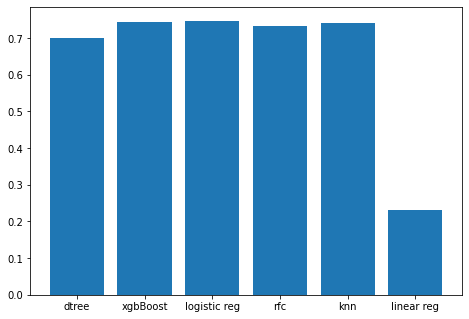

In [ ]:
fig_2 = plt.figure()
ax = fig_2.add_axes([0,0,1,1])
methods = ['dtree','xgbBoost', 'logistic reg', 'rfc', 'knn', 'linear reg']
accuracy = [res_dtree, res_xgb, res_logistic_reg, res_rfc, res_knn, res_linear_reg ]
ax.bar(methods, accuracy)
plt.show()

In [ ]:
print(res_logistic_reg)
print(res_xgb)
print(res_knn)

0.7480314960629921
0.7440944881889764
0.7401574803149606


In [419]:
#Finding and using hyperparameters 
from sklearn.model_selection import GridSearchCV
grid = {"C":[0,1,2,3,4], "penalty":["l1","l2"]}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2'}
accuracy : 0.74832083958021


In [423]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 300, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 211, 222, 233,
                                                         244, 255, 266, 277,
                                                         288, 300]},
                   random_state=42, verbose=2)

In [ ]:
logreg2=LogisticRegression(C=1,penalty="l2")
logreg2.fit(X_train,y_train)
print("score",logreg2.score(X_test,y_test))

score 0.8125


In [424]:
print(rf_random.score(X_test, y_test))

0.796875


In [425]:
#Principal component analysis
from sklearn import linear_model, decomposition
from sklearn.pipeline import Pipeline
pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca),
                           ('logistic_Reg', logreg)])
n_components = list(range(1,X_train.shape[1]+1,1))
print(n_components)
C = np.logspace(-4, 4, 50)
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'warn']
penalty = ['l1', 'l2', 'none', 'elasticnet']
parameters = dict(pca__n_components=n_components,
                      logistic_Reg__C=C,
                      logistic_Reg__penalty=penalty,
                      logistic_Reg__solver=solvers)
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_train, y_train)
print('Best Penalty:', clf_GS.best_estimator_.get_params()['logistic_Reg__penalty'])
print('Best C:', clf_GS.best_estimator_.get_params()['logistic_Reg__C'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['logistic_Reg'])

[1, 2, 3, 4, 5, 6, 7, 8]
Best Penalty: none
Best C: 0.0001
Best Number Of Components: 8

LogisticRegression(C=0.0001, penalty='none', solver='newton-cg')


In [426]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_train)
X_pca1= pca.fit_transform(X_test)
blr = LogisticRegression(C=0.2682695795279725, solver='liblinear', penalty='l2')
lo = blr.fit(X_pca, y_train)
print(lo.score(X_pca1, y_test))

0.78125


In [434]:
from sklearn.model_selection import cross_val_score

scores_dtree = cross_val_score(dtree, X_train, y_train, cv=10, scoring='accuracy')
scores_xgb_model = cross_val_score(xgb_model, X_train, y_train, cv=10, scoring='accuracy')
scores_logreg = cross_val_score(logreg, X_train, y_train, cv=10, scoring = 'accuracy')
print(scores_logreg)
scores_clf1 = cross_val_score(clf1, X_train, y_train, cv=10, scoring = 'accuracy')
print(scores_clf1)
scores_model = cross_val_score(model, X_train, y_train, cv=10, scoring = 'accuracy')
scores_regg = cross_val_score(regg, X_train, y_train, cv=10, scoring = 'accuracy')
scores_dtree = np.mean(scores_dtree)
scores_xgb_model = np.mean(scores_xgb_model)
scores_logreg = np.mean(scores_logreg)
scores_clf1 = np.mean(scores_clf1)
scores_model = np.mean(scores_model)
scores_regg = np.mean(scores_regg)

[0.77586207 0.63793103 0.79310345 0.75862069 0.70689655 0.75862069
 0.70175439 0.71929825 0.66666667 0.8245614 ]
[0.75862069 0.72413793 0.72413793 0.82758621 0.75862069 0.79310345
 0.63157895 0.78947368 0.66666667 0.94736842]


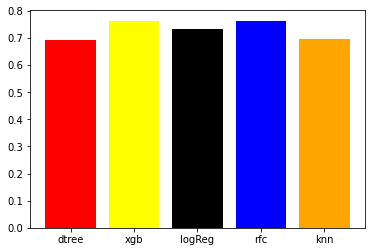

In [428]:
method = ['dtree','xgb','logReg','rfc','knn', 'linearReg']
accuracy_res = [scores_dtree, scores_xgb_model, scores_logreg, scores_clf1, scores_model, scores_regg]
c = ['red', 'yellow', 'black', 'blue', 'orange', 'purple']
 
#bar plot
plt.bar(method, height = accuracy_res, color = c)
 
plt.show()

As per above observation, i found that xgBoosting, RandomForestClassifier, and LogisticRegression model has more accuracy.

In [431]:
clf1.feature_importances_

array([0.08257119, 0.24697903, 0.08379133, 0.07359201, 0.08393749,
       0.15881688, 0.13096844, 0.13934362])

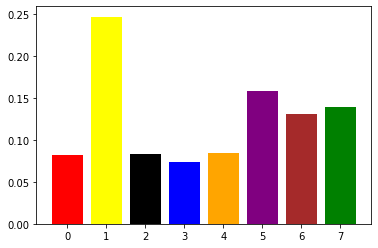

In [433]:
af = clf1.feature_importances_
method = [0, 1, 2, 3, 4, 5, 6, 7]
accuracy_res = af
c = ['red', 'yellow', 'black', 'blue', 'orange', 'purple', 'brown', 'green']
 
#bar plot
plt.bar(method, height = accuracy_res, color = c)
 
plt.show()

**Glucose as a feature is the most important in this dataset**